In [166]:
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [48]:
start = timeit.default_timer()

data_path = "../data/HI-Medium_Trans.csv"
df = pd.read_csv(data_path)

stop = timeit.default_timer()
print('Time:', stop - start)  

Time: 30.092553899999984


In [49]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:17,20,800104D70,20,800104D70,6794.63,US Dollar,6794.63,US Dollar,Reinvestment,0
1,2022/09/01 00:02,3196,800107150,3196,800107150,7739.29,US Dollar,7739.29,US Dollar,Reinvestment,0
2,2022/09/01 00:17,1208,80010E430,1208,80010E430,1880.23,US Dollar,1880.23,US Dollar,Reinvestment,0
3,2022/09/01 00:03,1208,80010E650,20,80010E6F0,73966883.00,US Dollar,73966883.00,US Dollar,Cheque,0
4,2022/09/01 00:02,1208,80010E650,20,80010EA30,45868454.00,US Dollar,45868454.00,US Dollar,Cheque,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31898238 entries, 0 to 31898237
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 2.6+ GB


In [51]:
df.isnull().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [52]:
start = timeit.default_timer()

print("Number of duplicates:", df.duplicated().sum())
 
stop = timeit.default_timer()
print('Time:', stop - start)  

Number of duplicates: 20
Time: 39.01324550000004


In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df.describe()

,From Bank,To Bank,Amount Received,Amount Paid,Is Laundering
count,3.189822e+07,3.189822e+07,3.189822e+07,3.189822e+07,3.189822e+07
mean,2.944094e+05,4.093194e+05,6.431120e+06,4.417554e+06,1.104450e-03
std,6.153148e+05,6.546999e+05,2.592745e+09,1.848314e+09,3.321492e-02
min,0.000000e+00,0.000000e+00,1.000000e-06,1.000000e-06,0.000000e+00
25%,2.954000e+03,2.749600e+04,2.078700e+02,2.092300e+02,0.000000e+00
50%,3.902400e+04,1.468530e+05,1.469260e+03,1.471540e+03,0.000000e+00
75%,2.158840e+05,2.598930e+05,1.183530e+04,1.175781e+04,0.000000e+00
max,3.225455e+06,3.225455e+06,8.158609e+12,8.158609e+12,1.000000e+00


In [55]:
df["Is Laundering"].value_counts()

Is Laundering
0    31862988
1       35230
Name: count, dtype: int64

In [64]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Extract Date, Day, and Time from the Timestamp
df["Date"] = df["Timestamp"].dt.date
df["Day"] = df["Timestamp"].dt.day_name()
df["Time"] = df["Timestamp"].dt.time                                              

df.drop(columns=["Timestamp"], inplace=True)

In [65]:
df.head(1)

,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Date,Day,Time
0,20,800104D70,20,800104D70,6794.63,US Dollar,6794.63,US Dollar,Reinvestment,0,2022-09-01,Thursday,00:17:00


# Money Laundering Activities by Day

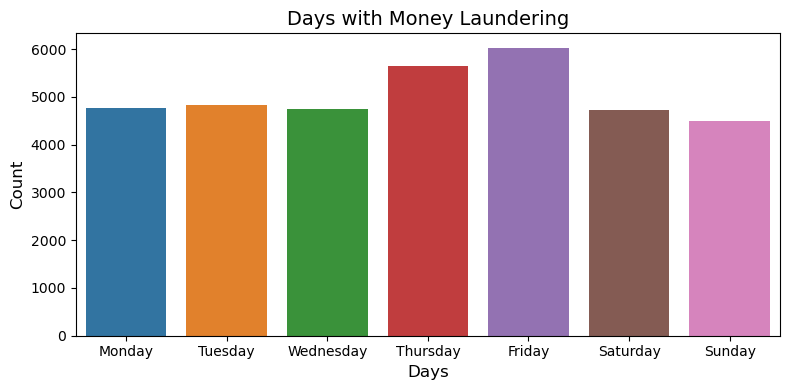

In [191]:
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day = df[df["Is Laundering"] == 1]["Day"].value_counts()
day = day.reindex(ordered_days).fillna(0)

colors = sns.color_palette("tab10", len(day))

plt.figure(figsize=(8, 4))
sns.barplot(x=day.index, y=day.values, palette=colors)

plt.title("Days with Money Laundering", fontsize=14)
plt.xlabel("Days", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

# Money Laundering Activities by Hours

In [176]:
def assign_hour_block(time_obj):
    return time_obj.hour + 1

df["Hour Block"] = df["Time"].apply(assign_hour_block)

<Axes: xlabel='Hour Block'>

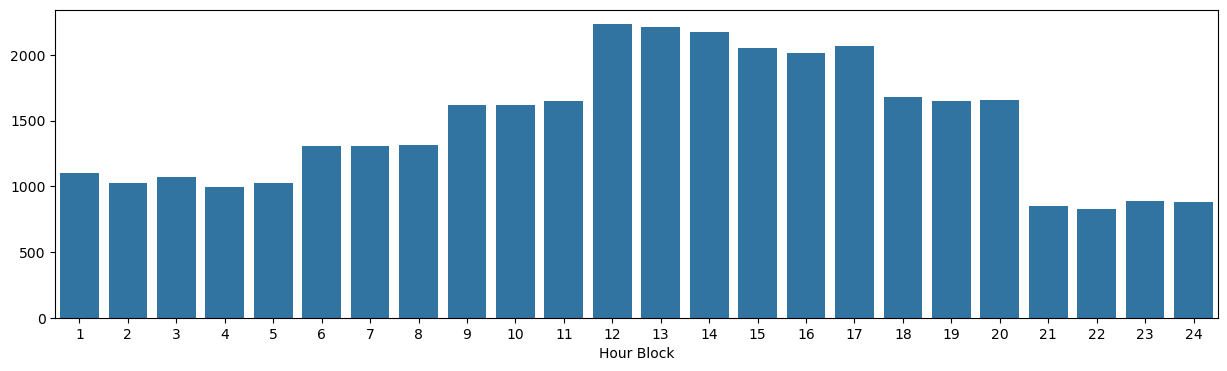

In [177]:
hour_block=df[df["Is Laundering"]==1]["Hour Block"].value_counts()

plt.figure(figsize=(15,4))
sns.barplot(x=hour_block.index,y=hour_block.values)

# Money Laundering Activities Based on Payment Format

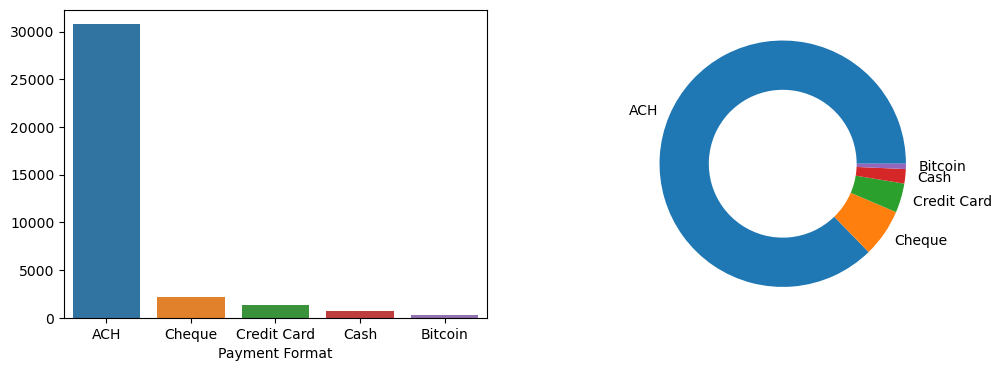

In [174]:
payment_format=df[df["Is Laundering"]==1]["Payment Format"].value_counts()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x=payment_format.index,y=payment_format.values, palette=colors[:5])

plt.subplot(1,2,2)
plt.pie(payment_format.values,labels=payment_format.index,wedgeprops=dict(width=0.4), colors=colors[:5]);

# Most Common Currencies Used in Money Laundering

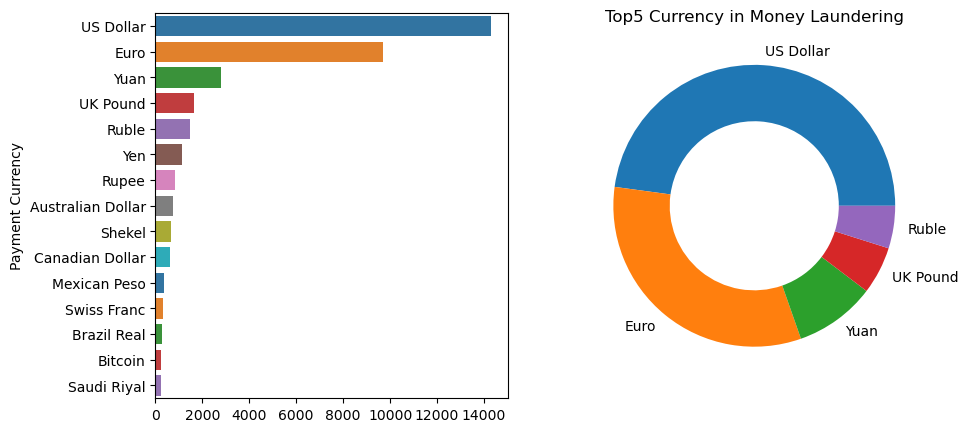

In [178]:
currency=df[df["Is Laundering"]==1]["Payment Currency"].value_counts()

colors = sns.color_palette("tab10", len(currency))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

sns.barplot(y=currency.index,x=currency.values, palette=colors)
plt.subplot(1,2,2)
currency=currency.head()
plt.title("Top5 Currency in Money Laundering")
plt.pie(currency.values,labels=currency.index,wedgeprops=dict(width=0.4));

# Banks Most Involved in Money Laundering

<Axes: xlabel='From Bank'>

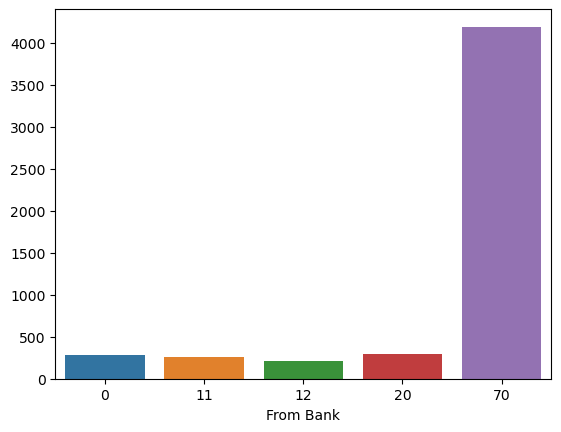

In [170]:
from_bank=df[df["Is Laundering"]==1]["From Bank"].value_counts().head()
sns.barplot(x=from_bank.index,y=from_bank.values, palette=colors[:5])

<Axes: xlabel='To Bank'>

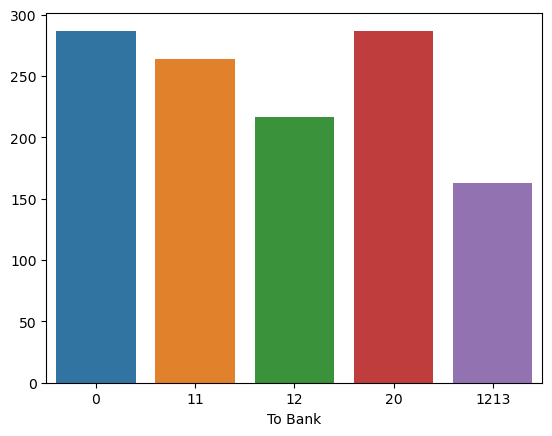

In [168]:
to_bank=df[df["Is Laundering"]==1]["To Bank"].value_counts().head()
sns.barplot(x=to_bank.index,y=to_bank.values, palette=colors[:5])